In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
## Look up pydocs!!
circles = pd.read_csv('/Users/rutvikdhopate/Downloads/circles_data.csv')
blobs = pd.read_csv('/Users/rutvikdhopate/Downloads/blobs_data.csv')
moons = pd.read_csv('/Users/rutvikdhopate/Downloads/moons_data.csv')

In [3]:
def get_data_plots(df):
    fig, ax = plt.subplots()
    for centre in zip(df.loc[:,df.columns[0]],df.loc[:,df.columns[1]]):
        circle = plt.Circle(centre, 3.75, color='red', fill=False)
        ax.add_artist(circle)
    
        ax.plot(centre[0], centre[1], 'bo')
    return plt.show()

In [4]:
def get_og_plots(df):
    return plt.scatter(df.loc[:,df.columns[0]],df.loc[:,df.columns[1]])

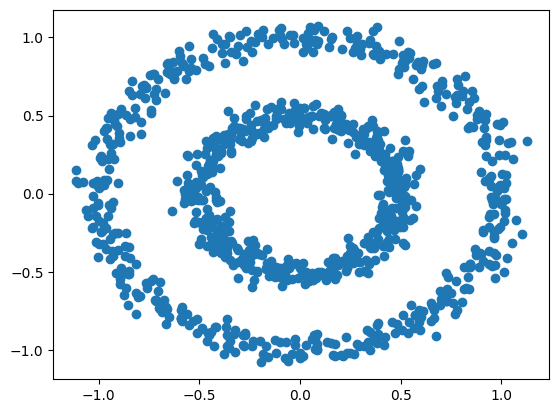

In [5]:
get_og_plots(circles)

In [6]:
def get_neighbors(index, eps, df):
    neighbors = np.where(cdist([centres[index]],centres)<eps)[1]
    return neighbors

In [7]:
def get_preprocessed_df(df, eps):
    df['cluster'] = np.nan

    centres = np.column_stack((df.loc[:,df.columns[0]],df.loc[:,df.columns[1]]))

    def get_neighbors(index, eps, df):
        neighbors = np.where(cdist([centres[index]],centres)<eps)[1]
        return neighbors
    
    num_neighbors = []
    neighbors = []
    for i in range(df.shape[0]):
        num_neighbors.append(len(get_neighbors(i,eps,df)))
        neighbors.append(get_neighbors(i,eps,df))
    
    df["num_neighbors"] = num_neighbors
    df["neighbors"] = neighbors

    return df

In [62]:
new_circles = get_preprocessed_df(moons, 0.3)

In [63]:
new_circles

,Xmoons_X1,Xmoons_X2,cluster,num_neighbors,neighbors
0,-0.378142,0.940750,NaN,142,"[0, 23, 27, 36, 38, 45, 54, 57, 60, 66, 68, 71..."
1,0.933566,0.153805,NaN,107,"[1, 3, 22, 61, 70, 93, 98, 111, 112, 113, 116,..."
2,2.048309,0.498172,NaN,70,"[2, 9, 42, 58, 80, 148, 156, 172, 210, 213, 22..."
3,0.947891,0.162473,NaN,108,"[1, 3, 22, 61, 70, 93, 98, 111, 112, 113, 116,..."
4,2.000739,0.183700,NaN,135,"[4, 9, 10, 17, 30, 35, 41, 79, 80, 86, 128, 14..."
...,...,...,...,...,...
1495,-0.022346,0.425338,NaN,88,"[50, 72, 118, 130, 143, 154, 171, 235, 310, 32..."
1496,0.090974,0.098361,NaN,143,"[25, 28, 33, 48, 50, 65, 72, 76, 84, 105, 115,..."
1497,1.390850,-0.439987,NaN,137,"[11, 29, 40, 49, 51, 67, 94, 95, 114, 117, 133..."
1498,-0.652389,0.769648,NaN,141,"[27, 37, 45, 52, 54, 57, 66, 71, 75, 83, 87, 8..."


In [64]:
def dbscan(new_df, minPts):
    c_id = 1

    # Iterate over all the rows in the df
    for i in range(new_df.shape[0]):
    
        # print(i, c_id)
        # Check 1 - If the data point has no cluster id
        # Move to the next point if it has a cluster id
        
        if not np.isnan(new_df['cluster'][i]):
            continue
    
        # Check 2 - Check the number of neighbors for the data point
        else:
            # c_id+=1
            # Inside this if, is going to be a for loop and that for loop will again have 3 same ifs.  
            # If neighbors >= 3, find the neighbors of the neighbors and store all the neighbors in a list which runs for that i
            if len(new_df['neighbors'][i]) >= minPts:
                neighbors = new_df['neighbors'][i]
                # print(neighbors)
                # new_df.loc[neighbors, 'cluster'] = c_id
    
                # Make a list of current neighbors for the particular i
                current_neighbors = set()
                current_neighbors.update(neighbors)
    
                # print(current_neighbors)
                # Iterate through the neighbors to find their neighbors and check their cluster id statuses
                # for n in current_neighbors.copy():
                while current_neighbors:
                    n = current_neighbors.pop()
    
                    # Check 3 - If n has no cluster id assigned, assign it the cluster id of current i
                    if np.isnan(new_df['cluster'][n]):
                        new_df.loc[n, 'cluster'] = c_id
    
                        # Since the neighbor had no cluster id, check how many neighbors does n have?
                        # If n's neighbors greater than three, append them in current neighbors and the loop will take care of that
                        if new_df['num_neighbors'][n] >= minPts:
                            # Get neighbors of n
                            current_neighbors.update(new_df['neighbors'][n])
                    # c_id +=1
                    # If the neighbor has a cluster id assigned, skip the neighbor and move to the next neighbor
                    # else:
                    #     continue
    
                # After running through all the neighbors, assign all the current neighbors the current cluster id
                # Move to the new point with nan cluster id and repeat the process
                
                new_df.loc[list(current_neighbors),'cluster'] = c_id
                c_id += 1
                
                
            # If neighbors < 3 and the point has no cluster index, mark it as outlier with label -1.
            else:
                new_df.loc[i, 'cluster'] = -1


    plt.scatter(new_df.loc[:,new_df.columns[0]],new_df.loc[:,new_df.columns[1]], c=new_df['cluster'])
    plt.colorbar()
    
    return new_df

,Xmoons_X1,Xmoons_X2,cluster,num_neighbors,neighbors
0,-0.378142,0.940750,1.0,142,"[0, 23, 27, 36, 38, 45, 54, 57, 60, 66, 68, 71..."
1,0.933566,0.153805,1.0,107,"[1, 3, 22, 61, 70, 93, 98, 111, 112, 113, 116,..."
2,2.048309,0.498172,2.0,70,"[2, 9, 42, 58, 80, 148, 156, 172, 210, 213, 22..."
3,0.947891,0.162473,1.0,108,"[1, 3, 22, 61, 70, 93, 98, 111, 112, 113, 116,..."
4,2.000739,0.183700,2.0,135,"[4, 9, 10, 17, 30, 35, 41, 79, 80, 86, 128, 14..."
...,...,...,...,...,...
1495,-0.022346,0.425338,2.0,88,"[50, 72, 118, 130, 143, 154, 171, 235, 310, 32..."
1496,0.090974,0.098361,2.0,143,"[25, 28, 33, 48, 50, 65, 72, 76, 84, 105, 115,..."
1497,1.390850,-0.439987,2.0,137,"[11, 29, 40, 49, 51, 67, 94, 95, 114, 117, 133..."
1498,-0.652389,0.769648,1.0,141,"[27, 37, 45, 52, 54, 57, 66, 71, 75, 83, 87, 8..."


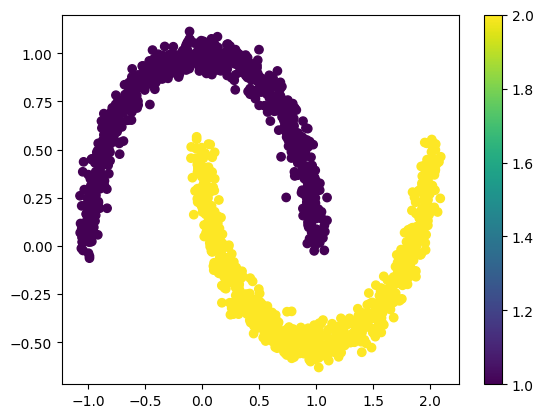

In [65]:
# If I observe the distance between the two clusters visually, that should be a good starting guess for eps.
# Always go decreasing eps if the guess does not work
dbscan(new_circles, 3)

In [37]:
new_df

,Xcircle_X1,Xcircle_X2,cluster,num_neighbors,neighbors
0,0.519781,-0.015981,1.0,22,"[0, 41, 58, 87, 181, 201, 244, 296, 321, 327, ..."
1,-0.057719,-0.420279,1.0,16,"[1, 54, 158, 163, 286, 383, 410, 470, 712, 742..."
2,-0.805155,-0.662227,2.0,11,"[2, 8, 23, 104, 231, 308, 473, 477, 606, 818, ..."
3,0.316549,0.312730,1.0,22,"[3, 11, 14, 49, 55, 96, 271, 412, 474, 485, 51..."
4,-0.304804,0.407563,1.0,29,"[4, 43, 106, 162, 195, 200, 236, 251, 377, 400..."
...,...,...,...,...,...
995,-0.222906,-0.326809,1.0,16,"[30, 190, 191, 204, 264, 398, 421, 426, 556, 5..."
996,-0.766648,0.677558,2.0,16,"[65, 237, 239, 242, 362, 372, 382, 496, 504, 6..."
997,-0.012036,0.396755,1.0,12,"[32, 94, 135, 141, 211, 439, 449, 466, 749, 80..."
998,0.398129,0.318982,1.0,19,"[3, 11, 96, 116, 271, 474, 485, 514, 557, 620,..."


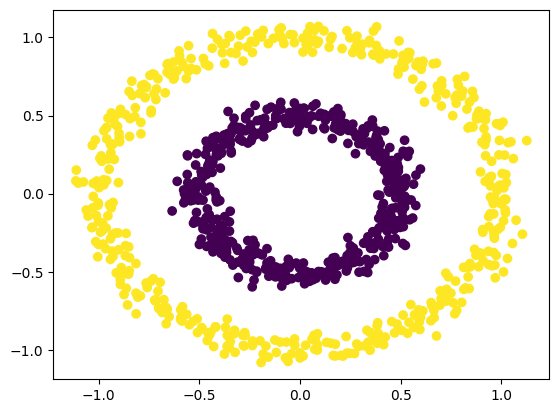

In [38]:
plt.scatter(new_df['Xcircle_X1'],new_df['Xcircle_X2'], c=new_df['cluster'])

In [16]:
from sklearn.cluster import DBSCAN

In [23]:
circles = pd.read_csv('/Users/rutvikdhopate/Downloads/circles_data.csv')
blobs = pd.read_csv('/Users/rutvikdhopate/Downloads/blobs_data.csv')
moons = pd.read_csv('/Users/rutvikdhopate/Downloads/moons_data.csv')

In [24]:
X = np.column_stack((circles.loc[:,circles.columns[0]],circles.loc[:,circles.columns[0]]))
clustering = DBSCAN(eps=0.1, min_samples=3).fit(X)

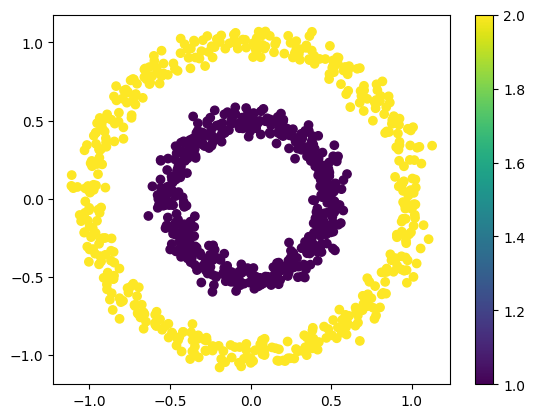

In [66]:
temp_df = pd.DataFrame()
temp_df['cluster'] = clustering.labels_
temp_df['x'] = circles['Xcircle_X1']
temp_df['y'] = circles['Xcircle_X2']

plt.scatter(new_df.loc[:,new_df.columns[0]],new_df.loc[:,new_df.columns[1]], c=new_df['cluster'])
plt.colorbar()

In [ ]:
cdist([centres[index]],centres)